In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
train_path = './spaceship-titanic/train.csv'
test_path = './spaceship-titanic/test.csv'

In [15]:
train_data = pd.read_csv(train_path, encoding = 'CP949', engine = 'python')
test_data = pd.read_csv(test_path, encoding = 'CP949', engine = 'python')

In [16]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Passenger ID
##### Passenger ID의 경우 gggg_pp로 gggg는 그룹의 번호, pp는 각 그룹 내의 번호
##### 해당 변수는 그룹 ID와 pp ID로 반정규화를 진행
##### pp ID의 경우 개인이 갖고 있는 의미가 없음
###### pp ID의 경우 해당 승객이 혼자 탔는지 그룹으로 탔는지 판별할 수 있을 수 있음

In [17]:
train_data = pd.concat([train_data, test_data])

In [18]:
passenger = pd.DataFrame(train_data["PassengerId"].apply(lambda x: x.split('_')).to_list(), columns=["group", "pp"])
passenger

,group,pp
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01
...,...,...
12965,9266,02
12966,9269,01
12967,9271,01
12968,9273,01


In [19]:
passenger['group'] = passenger['group'].apply(lambda x: int(x))

In [20]:
# passenger가 Group인지 개인인지 판단
passenger_group = list(passenger['group'])
passenger_group_bool = []
for x in passenger_group:
    group_bool = passenger_group.count(x)
    
    if group_bool == 1:
        passenger_group_bool.append(False)
    else:
        passenger_group_bool.append(True)

print(len(passenger_group_bool))
print(train_data.shape)

12970
(12970, 14)


In [21]:
Group_count = []
for x in passenger['group']:
    num_list = list(passenger[passenger['group'] == x]['pp'].apply(lambda x: int(x)))
    num = max(num_list)
    Group_count.append(num)

print(len(Group_count))
print(train_data.shape)

12970
(12970, 14)


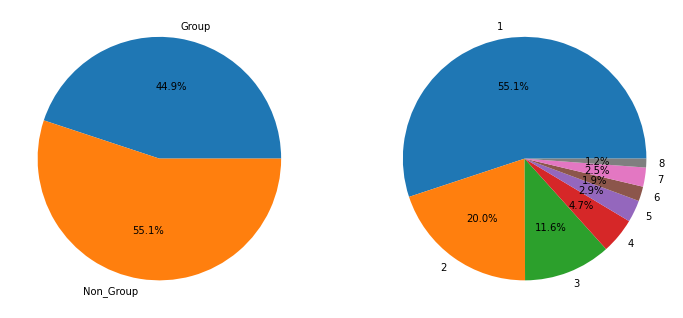

In [22]:
plt.figure(figsize=(12,16))

plt.subplot(221)
plt.pie([passenger_group_bool.count(True), passenger_group_bool.count(False)], labels = ['Group','Non_Group'],  autopct='%.1f%%')

plt.subplot(222)
plt.pie([Group_count.count(x) for x in set(Group_count)], labels = [x for x in range(1,9)],  autopct='%.1f%%')


plt.show()

##### Group Bool과 Group Count가 같은 의미지만 Group Count가 더 자세한 정보를 출력
##### Group Count의 값만 포함한다

In [23]:
train_data['Group_count'] = Group_count
train_data = train_data.drop(['PassengerId'], axis = 'columns')
train_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group_count
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,2
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,1
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,1
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,1


In [24]:
train_data.columns
train_data = train_data[['Group_count', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported']]
train_data

,Group_count,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,2,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,1,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,1,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,1,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


### Name
##### Name의 경우 성이 같으면 그룹이라 판별할 수 있지만 Group_Count라는 변수를 통해 값을 확인했으므로 의미가 없음

### AGE
##### Age의 경우 작은자리는 의미가 없기 때문에 이산형 Data로 분류

In [25]:
max(train_data['Age'].unique())

79.0

In [26]:
def category_age(x):
    if x< 10:
        return 0
      elif x < 20:
        return 1
      elif x < 30:
        return 2
      elif x < 40:
        return 3
      elif x < 50:
        return 4
      elif x < 60:
        return 5
      elif x < 70:
        return 6
      elif x < 80:
        return 7

In [27]:
train_data['age_category'] = train_data['Age'].apply(lambda x: category_age(x))

/var/folders/2w/1mdh4mlj4xz0dwl8zstsj_z40000gn/T/ipykernel_30067/1982120034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['age_category'] = train_data['Age'].apply(lambda x: category_age(x))


### RoomService, FoodCourt, ShoppingMall, Spa,  VRDeck    

In [28]:
train_data_corr = train_data.corr(method='pearson')
train_data_corr

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category
Group_count,1.000000,-0.178402,-0.033886,0.019643,-0.039131,0.017875,0.009689,-0.168901
Age,-0.178402,1.000000,0.067300,0.124447,0.034959,0.118992,0.101441,0.979853
RoomService,-0.033886,0.067300,1.000000,-0.020146,0.057402,0.008936,-0.023847,0.064185
FoodCourt,0.019643,0.124447,-0.020146,1.000000,-0.001589,0.228990,0.244279,0.118341
ShoppingMall,-0.039131,0.034959,0.057402,-0.001589,1.000000,0.010504,0.004485,0.034049
Spa,0.017875,0.118992,0.008936,0.228990,0.010504,1.000000,0.149874,0.114342
VRDeck,0.009689,0.101441,-0.023847,0.244279,0.004485,0.149874,1.000000,0.094583
age_category,-0.168901,0.979853,0.064185,0.118341,0.034049,0.114342,0.094583,1.000000


In [29]:
service_df = pd.DataFrame({'RoomService' : train_data['RoomService'], 
                          'FoodCourt' : train_data['FoodCourt'], 
                          'ShoppingMall' : train_data['ShoppingMall'], 
                          'Spa' : train_data['Spa'], 
                          'VRDeck' : train_data['VRDeck'],
                           'VIP' : train_data['VIP']})
service_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP
0,0.0,0.0,0.0,0.0,0.0,False
1,109.0,9.0,25.0,549.0,44.0,False
2,43.0,3576.0,0.0,6715.0,49.0,True
3,0.0,1283.0,371.0,3329.0,193.0,False
4,303.0,70.0,151.0,565.0,2.0,False


### 연속형 변수 간의 연관관계가 존재하는 지 확인

In [30]:
for x in service_df.columns:
    print(x, service_df[x].is_unique)

RoomService False
FoodCourt False
ShoppingMall False
Spa False
VRDeck False
VIP False


In [42]:
service_df.corr(method='pearson')

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
RoomService,1.000000,-0.020146,0.057402,0.008936,-0.023847
FoodCourt,-0.020146,1.000000,-0.001589,0.228990,0.244279
ShoppingMall,0.057402,-0.001589,1.000000,0.010504,0.004485
Spa,0.008936,0.228990,0.010504,1.000000,0.149874
VRDeck,-0.023847,0.244279,0.004485,0.149874,1.000000


### 위의 값이 0의 분포가 많은 것을 확인

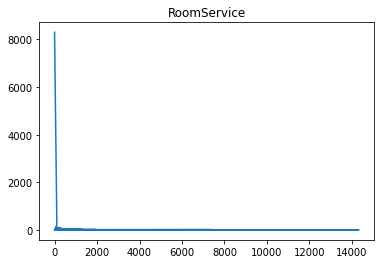

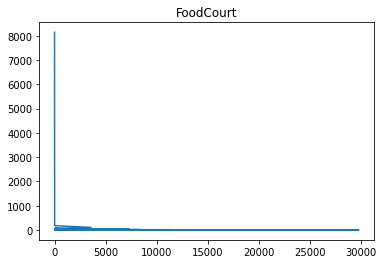

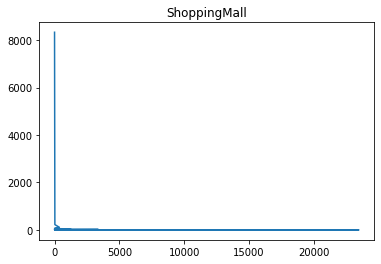

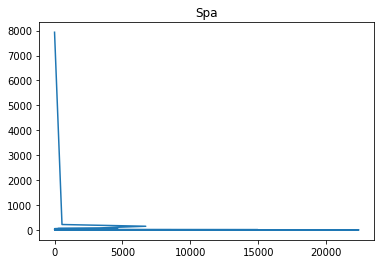

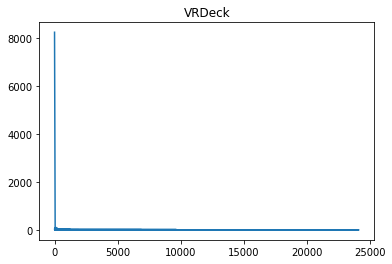

In [43]:
for x in service_df.columns:
    if x == 'VIP':
    continue
    plt.plot(service_df[service_df[x].notnull()][x].unique(), service_df[x].value_counts())
    plt.title(x)
    plt.show()

In [46]:
for x in service_df.columns:
    if x == 'VIP':
        continue

    print(x,' : ', service_df[x].count(),' ',service_df[service_df[x]==0][x].count())

RoomService  :  12707   8303
FoodCourt  :  12681   8146
ShoppingMall  :  12664   8331
Spa  :  12686   7935
VRDeck  :  12702   8252


##### 서비스를 이용한 사람들은 CryoSleep를 하지 않았다는 규칙 발견

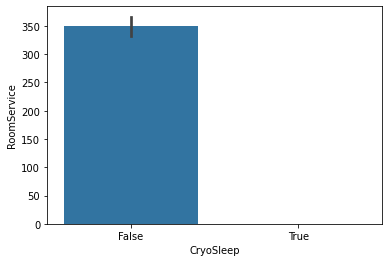

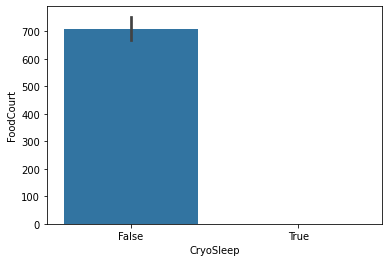

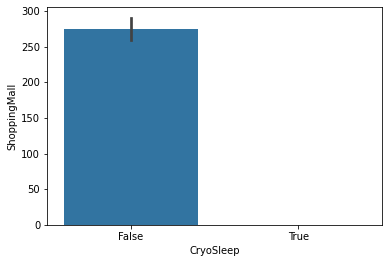

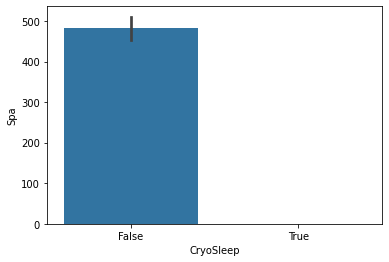

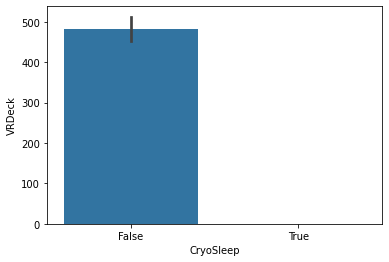

In [47]:
for i in service_df.columns:
    if i == 'VIP':
        continue
    sns.barplot(x = train_data['CryoSleep'], y = i, data = service_df)
    plt.show()

##### CryoSleep를 하지 않은 인원의 경우 평균으로 값을 지정하고,
##### CrypSleep를 한 인원의 경우 0으로 값을 저장한다

In [49]:
for x in service_df.columns:
    if x == 'VIP':
        continue
    train_data.loc[(train_data[x].isnull()) & (train_data['CryoSleep'] == True), x] = 0

In [50]:
train_data.isnull().sum()

Group_count        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      170
FoodCourt        180
ShoppingMall     175
Spa              177
VRDeck           177
Name             294
Transported     4277
age_category     270
dtype: int64

In [51]:
for x in service_df.columns:
    if x == 'VIP':
        continue
    print(x)
    mean = train_data[train_data['CryoSleep'] == False][x].mean() 
    print(mean)
    train_data.loc[(train_data[x].isnull()) & (train_data['CryoSleep'] == False), x] = mean

RoomService
349.1531850353893
FoodCourt
709.2690458111871
ShoppingMall
274.16578215820067
Spa
482.310532304969
VRDeck
481.59519595448796


In [52]:
train_data.isnull().sum()

Group_count        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService        3
FoodCourt          3
ShoppingMall      10
Spa                7
VRDeck             8
Name             294
Transported     4277
age_category     270
dtype: int64

##### 또한 나이 분포로 보았을 때 0에 속하는 경우는 CryoSleep이 False라도 쇼핑을 하지 않을 경우가 있다

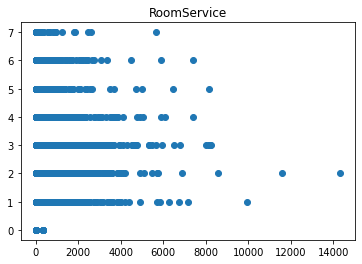

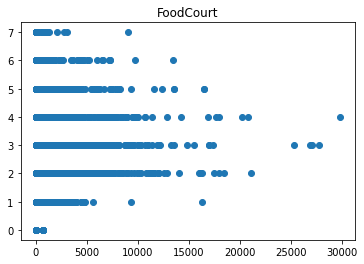

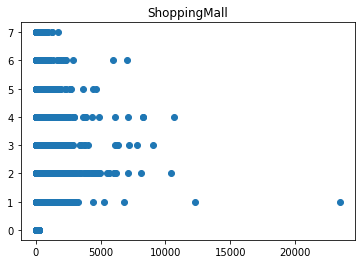

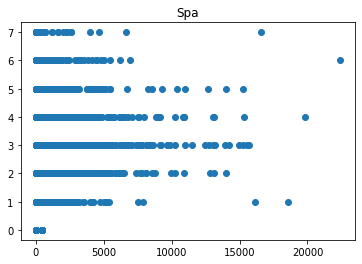

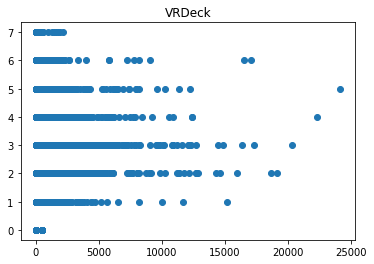

<Figure size 432x288 with 0 Axes>

In [54]:
for x in service_df.columns:
    if x == 'VIP':
        continue
    plt.scatter(train_data[x], train_data['age_category'])
    plt.title(x)
    plt.show()
    plt.savefig(x +'.png')

/Users/hahmwj/miniforge3/envs/hahm/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_category', ylabel='count'>

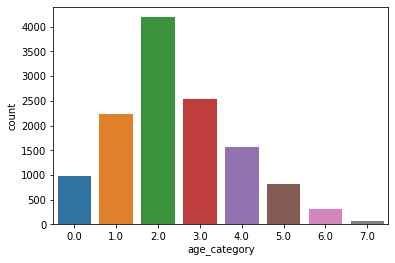

In [55]:
sns.countplot(train_data['age_category'])

### RoomService 남은 결측값

In [56]:
train_data[train_data['RoomService'].isnull()]

,Group_count,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,age_category
4129,1,Earth,NaN,G/726/P,TRAPPIST-1e,38.0,False,NaN,2.0,404.0,121.0,0.0,Lis Scotterkins,False,3.0
6072,1,Earth,NaN,E/428/S,TRAPPIST-1e,31.0,False,NaN,0.0,873.0,0.0,0.0,Estina Holcompson,True,3.0
2878,8,Earth,NaN,F/1310/P,TRAPPIST-1e,24.0,False,NaN,0.0,0.0,0.0,828.0,Joana Casez,NaN,2.0


In [57]:
###해당 고객은 RoomService를 이용하지 않았다고 판단
train_data.loc[4129, 'CryoSleep'] = False
train_data.loc[4129, 'RoomService'] = 0

train_data.loc[6072, 'CryoSleep'] = False
train_data.loc[6072, 'RoomService'] = 0

train_data.loc[2878, 'CryoSleep'] = False
train_data.loc[2878, 'RoomService'] = 0

### FoodCourt 남은 결측값

In [58]:
train_data[train_data['FoodCourt'].isnull()]

,Group_count,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,age_category
3232,4,Earth,NaN,G/571/P,55 Cancri e,4.0,False,0.0,NaN,0.0,0.0,0.0,Gabrie Joycerton,True,0.0
5370,1,Earth,NaN,F/1189/P,TRAPPIST-1e,23.0,False,1.0,NaN,1.0,0.0,618.0,Ton Maynardner,False,2.0
7948,1,Europa,NaN,C/282/P,55 Cancri e,32.0,True,65.0,NaN,0.0,88.0,9811.0,Kajamak Boderbint,False,3.0


In [59]:
###다른 서비스 사용 유무에 따라, CyroSleep과 해당 값을 결정
train_data.loc[3232, 'CryoSleep'] = True
train_data.loc[3232, 'FoodCourt'] = 0

train_data.loc[5370, 'CryoSleep'] = False
train_data.loc[5370, 'FoodCourt'] = 0

train_data.loc[7948, 'CryoSleep'] = False
train_data.loc[7948, 'FoodCourt'] = 0

### ShoppingMall 남은 결측값

In [60]:
train_data[train_data['ShoppingMall'].isnull()]

,Group_count,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,age_category
2231,1,Earth,NaN,G/385/P,TRAPPIST-1e,24.0,False,0.0,0.0,NaN,59.0,4120.0,Joelan Burrilllins,False,2.0
2402,1,Earth,NaN,G/417/P,PSO J318.5-22,21.0,False,0.0,0.0,NaN,0.0,0.0,Lilace Woodwardy,False,2.0
4164,5,Europa,NaN,B/175/S,TRAPPIST-1e,33.0,False,0.0,4017.0,NaN,NaN,2260.0,Phah Chocaters,True,3.0
4565,1,Europa,NaN,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,NaN,28.0,1362.0,Phacton Unsible,False,3.0
5409,1,Earth,NaN,F/1199/P,PSO J318.5-22,46.0,NaN,559.0,25.0,NaN,22.0,765.0,Katen River,False,4.0
5799,6,Europa,NaN,C/230/S,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Azhasim Bewarsecal,True,0.0
6969,1,Mars,NaN,E/479/P,55 Cancri e,20.0,False,0.0,0.0,NaN,0.0,0.0,Diles Merte,False,2.0
7058,1,Earth,NaN,F/1436/S,PSO J318.5-22,29.0,False,5.0,598.0,NaN,0.0,0.0,Byrona Berges,False,2.0
1124,4,Earth,NaN,G/382/P,TRAPPIST-1e,61.0,False,17.0,21.0,NaN,0.0,111.0,Elle Hoffergess,NaN,6.0
4230,1,Earth,NaN,F/1776/S,TRAPPIST-1e,14.0,False,0.0,0.0,NaN,1377.0,29.0,Garyan Gainebergan,NaN,1.0


In [61]:
###다른 장소를 사용한 기록이 있는 인원의 ShoppimgMall은 0으로 CyroSleep은 False로 값을 바꿔준다
train_data.loc[2231, 'ShoppingMall'] = 0
train_data.loc[2231, 'CryoSleep'] = False

train_data.loc[2402, 'ShoppingMall'] = 0
train_data.loc[2402, 'CryoSleep'] = True

train_data.loc[4164, 'ShoppingMall'] = 0
train_data.loc[4164, 'CryoSleep'] = False

train_data.loc[4565, 'ShoppingMall'] = 0
train_data.loc[4565, 'CryoSleep'] = False

train_data.loc[5409, 'ShoppingMall'] = 0
train_data.loc[5409, 'CryoSleep'] = False

train_data.loc[5799, 'ShoppingMall'] = 0
train_data.loc[5799, 'CryoSleep'] = True

train_data.loc[6969, 'ShoppingMall'] = 0
train_data.loc[6969, 'CryoSleep'] = True

train_data.loc[7058, 'ShoppingMall'] = 0
train_data.loc[7058, 'CryoSleep'] = False

train_data.loc[1124, 'ShoppingMall'] = 0
train_data.loc[1124, 'CryoSleep'] = False

train_data.loc[4230, 'ShoppingMall'] = 0
train_data.loc[4230, 'CryoSleep'] = False

### Spa 남은 결측값

In [62]:
train_data[train_data['Spa'].isnull()]

,Group_count,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,age_category
2134,3,Earth,NaN,G/365/S,55 Cancri e,6.0,False,0.0,0.0,0.0,NaN,0.0,Patoya Pittler,False,0.0
3072,1,Earth,NaN,F/627/S,TRAPPIST-1e,15.0,False,10.0,0.0,99.0,NaN,2031.0,NaN,False,1.0
4164,5,Europa,False,B/175/S,TRAPPIST-1e,33.0,False,0.0,4017.0,0.0,NaN,2260.0,Phah Chocaters,True,3.0
4834,1,Earth,NaN,G/844/S,TRAPPIST-1e,40.0,False,814.0,12.0,2.0,NaN,79.0,Melia Gardsondez,True,4.0
6904,1,Europa,NaN,C/237/P,NaN,33.0,False,0.0,0.0,0.0,NaN,0.0,Aldun Venticable,True,3.0
2523,4,Earth,NaN,G/888/S,55 Cancri e,0.0,False,0.0,0.0,0.0,NaN,0.0,Stal Mayods,NaN,0.0
3165,2,Europa,NaN,E/442/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,NaN,0.0,Gatrix Imprank,NaN,2.0


In [63]:

###다른 장소를 사용한 기록이 있는 인원의 Spa는 0으로 CyroSleep은 False로 값을 바꿔준다
train_data.loc[2134, 'Spa'] = 0
train_data.loc[2134, 'CryoSleep'] = True

train_data.loc[3072, 'Spa'] = 0
train_data.loc[3072, 'CryoSleep'] = False

train_data.loc[4164, 'Spa'] = 0

train_data.loc[4834, 'Spa'] = 0
train_data.loc[4834, 'CryoSleep'] = False

train_data.loc[6904, 'Spa'] = 0
train_data.loc[6904, 'CryoSleep'] = True

train_data.loc[2523, 'Spa'] = 0
train_data.loc[2523, 'CryoSleep'] = True

train_data.loc[3165, 'Spa'] = 0
train_data.loc[3165, 'CryoSleep'] = True

### VRDeck 남은 결측값

In [64]:
train_data[train_data['VRDeck'].isnull()]

,Group_count,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,age_category
111,1,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True,2.0
1531,3,Earth,NaN,G/250/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,NaN,Eristy Barbes,True,0.0
2639,5,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,0.0,NaN,Salley Harverez,False,0.0
3850,1,Europa,NaN,B/130/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,NaN,Dsch Ainserfle,True,2.0
6688,1,Earth,NaN,F/1463/P,PSO J318.5-22,23.0,False,64.0,4.0,0.0,1125.0,NaN,Benny Mayson,False,2.0
7491,3,Europa,NaN,B/315/S,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,NaN,Kitauon Pulgaly,True,0.0
8675,1,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,4.0
1206,1,Earth,NaN,F/493/S,PSO J318.5-22,22.0,False,0.0,1185.0,3.0,0.0,NaN,Gracy Wallerson,NaN,2.0


In [65]:
###다른 장소를 사용한 기록이 있는 인원의 Spa는 0으로 CyroSleep은 False로 값을 바꿔준다
train_data.loc[111, 'VRDeck'] = 0
train_data.loc[111, 'CryoSleep'] = True

train_data.loc[1531, 'VRDeck'] = 0
train_data.loc[1531, 'CryoSleep'] = True

train_data.loc[2639, 'VRDeck'] = 0
train_data.loc[2639, 'CryoSleep'] = True

train_data.loc[3850, 'VRDeck'] = 0
train_data.loc[3850, 'CryoSleep'] = True

train_data.loc[6688, 'VRDeck'] = 0
train_data.loc[6688, 'CryoSleep'] = False

train_data.loc[7491, 'VRDeck'] = 0
train_data.loc[7491, 'CryoSleep'] = True

train_data.loc[8675, 'VRDeck'] = 0
train_data.loc[8675, 'CryoSleep'] = False

train_data.loc[1206, 'VRDeck'] = 0
train_data.loc[1206, 'CryoSleep'] = False

In [66]:
train_data.isnull().sum()

Group_count        0
HomePlanet       288
CryoSleep        280
Cabin            299
Destination      274
Age              270
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
age_category     270
dtype: int64

### CyroSleep의 경우 VIP, RoomService등의 행동이 있으면 항상 False값을 부여

In [67]:
train_data_1 = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
train_data['total_service'] = train_data_1.sum(axis = 1)

/var/folders/2w/1mdh4mlj4xz0dwl8zstsj_z40000gn/T/ipykernel_30067/3348298891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['total_service'] = train_data_1.sum(axis = 1)


In [68]:
train_data.loc[train_data['CryoSleep'].isnull() & train_data['total_service'] > 0, 'CryoSleep'] = False
train_data.loc[train_data['CryoSleep'].isnull() & train_data['total_service'] == 0, 'CryoSleep'] = True

In [69]:
train_data.isnull().sum()

Group_count         0
HomePlanet        288
CryoSleep           0
Cabin             299
Destination       274
Age               270
VIP               296
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              294
Transported      4277
age_category      270
total_service       0
dtype: int64

### AGE

In [70]:
train_data['RoomService'].apply(lambda x : int(x))
train_data['FoodCourt'].apply(lambda x : int(x))
train_data['ShoppingMall'].apply(lambda x : int(x))
train_data['Spa'].apply(lambda x : int(x))
train_data['VRDeck'].apply(lambda x : int(x))

0         0
1        44
2        49
3       193
4         2
       ... 
4272      0
4273    144
4274      0
4275    523
4276      0
Name: VRDeck, Length: 12970, dtype: int64

In [73]:
age_training = train_data[train_data['Age'].notnull()]
x = age_training[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
y = age_training[['Age']]

mlr = LinearRegression()
mlr.fit(x, y) 

LinearRegression()

In [74]:
age_testing = train_data[train_data['Age'].isnull()]
test_age = age_testing[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
predict = mlr.predict(test_age)

In [76]:
predict = list(predict)
for i in range(len(predict)):
    predict[i] = int(predict[i])

age_null_list = train_data.index[train_data['Age'].isnull()].tolist()

In [77]:
for i in range(len(age_null_list)):
    train_data.loc[age_null_list[i], 'Age'] = predict[i]

In [78]:
train_data.isnull().sum()

Group_count         0
HomePlanet        288
CryoSleep           0
Cabin             299
Destination       274
Age                 0
VIP               296
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              294
Transported      4277
age_category      270
total_service       0
dtype: int64

### Cabin EDA

In [79]:
train_data.loc[train_data['Cabin'].isnull(), 'Cabin'] = 'F/1000/s'

In [80]:
train_data.isnull().sum()

Group_count         0
HomePlanet        288
CryoSleep           0
Cabin               0
Destination       274
Age                 0
VIP               296
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              294
Transported      4277
age_category      270
total_service       0
dtype: int64

In [81]:
train_data['Deck'] = train_data.Cabin.str.split('/').str[0]
train_data['room_number'] = train_data.Cabin.str.split('/').str[1]
train_data['room_side'] = train_data.Cabin.str.split('/').str[2]
train_data = train_data.drop(['Cabin'], axis = 'columns')
train_data

/var/folders/2w/1mdh4mlj4xz0dwl8zstsj_z40000gn/T/ipykernel_30067/1240489366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Deck'] = train_data.Cabin.str.split('/').str[0]
/var/folders/2w/1mdh4mlj4xz0dwl8zstsj_z40000gn/T/ipykernel_30067/1240489366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['room_number'] = train_data.Cabin.str.split('/').str[1]
/var/folders/2w/1mdh4mlj4xz0dwl8zstsj_z40000gn/T/ipykernel_30067/1240489366.py:3: SettingWithCopyWarning: 
A value is trying to b

,Group_count,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,age_category,total_service,Deck,room_number,room_side
0,1,Europa,True,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,3.0,0.0,B,0,P
1,1,Earth,True,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0,736.0,F,0,S
2,2,Europa,True,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,5.0,10383.0,A,0,S
3,2,Europa,True,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3.0,5176.0,A,0,S
4,1,Earth,True,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1.0,1091.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,3.0,0.0,G,1496,S
4273,1,Earth,True,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,4.0,1018.0,F,1000,s
4274,1,Mars,True,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,NaN,0.0,D,296,P
4275,1,Europa,True,NaN,29.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,NaN,3203.0,D,297,P


In [82]:
train_data['Deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [84]:
train_data['room_side'].unique()

array(['P', 'S', 's'], dtype=object)

In [85]:
train_data['room_number'].fillna(10000).apply(lambda x: int(x))

0          0
1          0
2          0
3          0
4          1
        ... 
4272    1496
4273    1000
4274     296
4275     297
4276    1498
Name: room_number, Length: 12970, dtype: int64

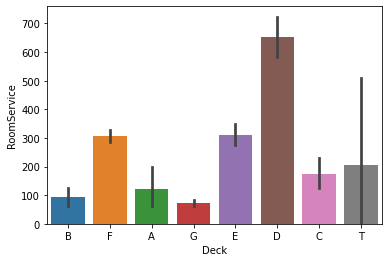

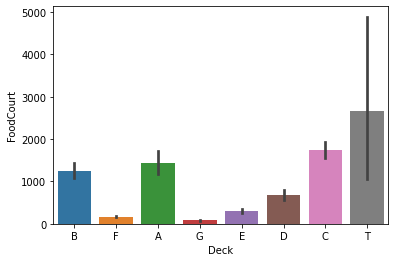

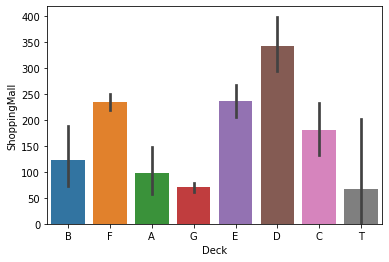

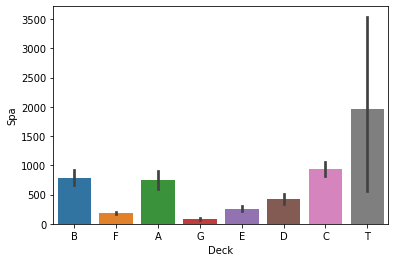

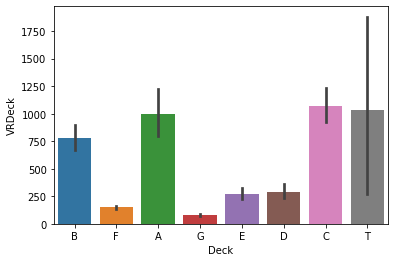

In [86]:
for i in service_df.columns:
    if i == 'VIP':
        continue
    sns.barplot(x = train_data['Deck'], y = i, data = service_df)
    plt.show()

In [87]:
train_data[train_data['Deck'].isnull()].describe()

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
train_data[train_data['Deck'].notnull()].describe()

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12700.000000,12970.000000
mean,2.022976,28.741789,222.873676,451.407989,174.267336,307.834501,306.709683,2.432126,1463.093186
std,1.577102,14.149037,641.443514,1567.407196,583.941968,1118.267567,1168.321822,1.445236,2812.583464
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,729.000000
75%,2.000000,37.000000,62.000000,94.000000,34.000000,68.000000,53.000000,3.000000,1503.750000
max,8.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,7.000000,35987.000000


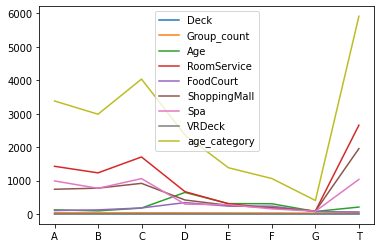

In [89]:
mean_df = train_data.groupby(['Deck'], as_index=False).mean()
for x in mean_df.columns:
    if x == 'Deck':
        continue
    plt.plot(mean_df['Deck'], mean_df[x])
plt.legend(mean_df.columns)
plt.show()

<AxesSubplot:xlabel='Deck', ylabel='total_service'>

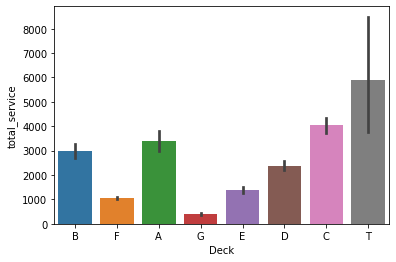

In [90]:
sns.barplot(x = train_data['Deck'], y = train_data['total_service'])

<AxesSubplot:xlabel='Deck', ylabel='count'>

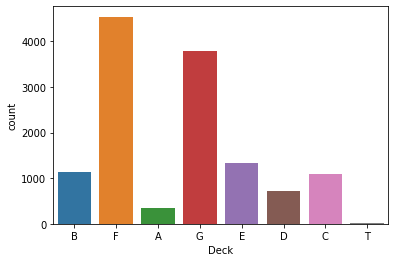

In [91]:
sns.countplot(x = train_data['Deck'])

### VIP EDA
##### VIP의 경우 전반적인 서비스에 있어서 높은 값을 보임

In [92]:
service_df[service_df['VIP']==False].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12149.000000,12123.000000,12107.000000,12125.000000,12142.000000
mean,216.735698,419.522808,174.006608,292.849402,285.578406
std,630.845068,1465.779835,595.481307,1090.430391,1116.953592
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,59.000000,26.000000,50.000000,37.000000
max,14327.000000,27071.000000,23492.000000,22408.000000,24133.000000


In [93]:
service_df[service_df['VIP']==True].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,269.000000,267.000000,266.000000,269.000000,266.000000
mean,486.349442,1793.651685,273.680451,932.847584,1207.199248
std,1058.272031,3593.931435,575.222273,2131.559126,2523.478754
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,280.000000,0.000000,46.000000,28.500000
75%,600.000000,2167.500000,277.250000,928.000000,1281.000000
max,8243.000000,29813.000000,3700.000000,15255.000000,19086.000000


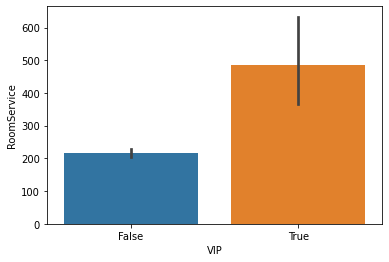

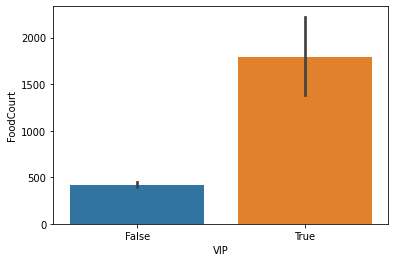

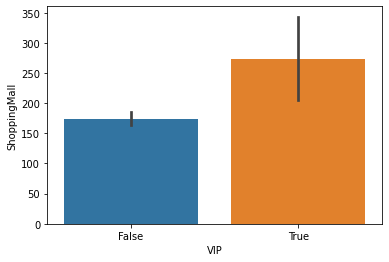

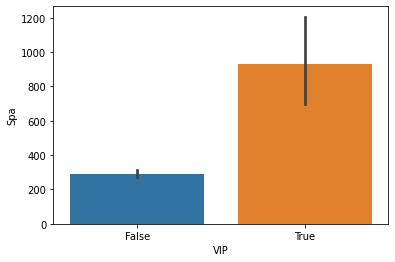

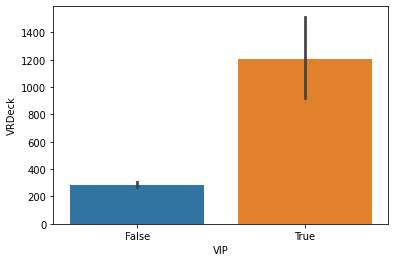

In [94]:
for i in service_df.columns:
    if i == 'VIP':
        continue
    sns.barplot(x = 'VIP', y = i, data = service_df)
    plt.show()

/Users/hahmwj/miniforge3/envs/hahm/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VIP', ylabel='count'>

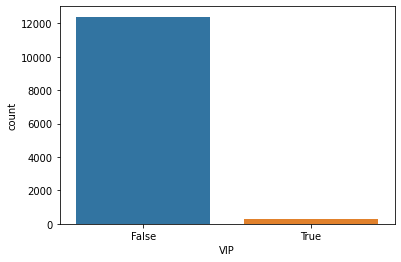

In [95]:
sns.countplot(train_data['VIP'])

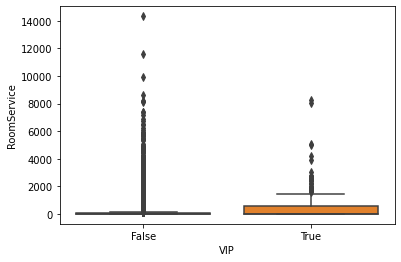

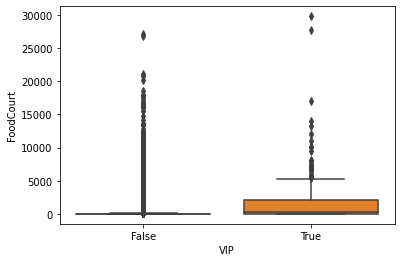

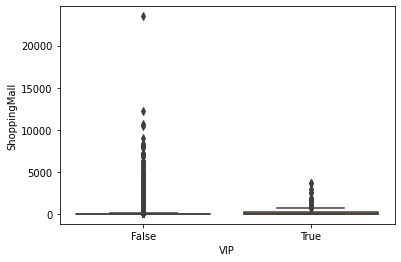

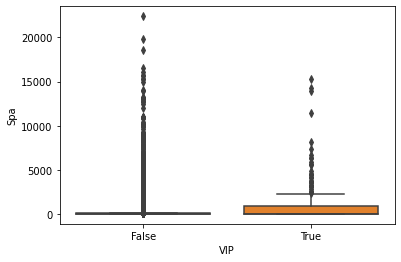

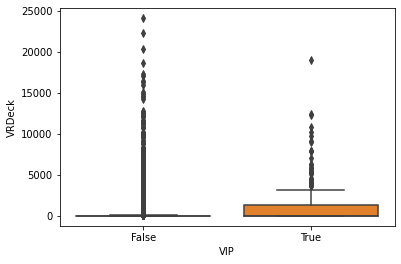

In [97]:
for i in service_df.columns:
    if i == 'VIP':
        continue
    sns.boxplot(x = 'VIP', y = i, data = service_df)
    plt.show()

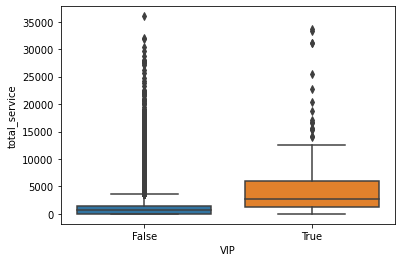

In [98]:
sns.boxplot(x = 'VIP', y = train_data['total_service'], data = train_data)
plt.show()

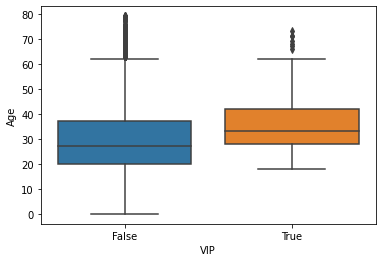

In [99]:
train_data_1 = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
train_data['total_service'] = train_data_1.sum(axis = 1)

sns.boxplot(x = 'VIP', y = train_data['Age'], data = train_data)
plt.show()

In [100]:
train_data[train_data['VIP'] == True].describe()

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,271.000000,273.000000
mean,2.065934,36.545788,484.339241,1756.912367,272.688625,924.479603,1185.065846,3.184502,4623.485682
std,1.301601,11.124905,1050.591614,3561.248209,568.013857,2117.095952,2494.787844,1.196871,5449.725520
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1299.000000
50%,2.000000,33.000000,2.000000,280.000000,0.000000,51.000000,31.000000,3.000000,2768.000000
75%,3.000000,42.000000,566.000000,2062.000000,274.165782,843.000000,1141.000000,4.000000,6066.165782
max,7.000000,73.000000,8243.000000,29813.000000,3700.000000,15255.000000,19086.000000,7.000000,33666.000000


In [101]:
train_data[train_data['VIP'] ==False].describe()

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
count,12401.000000,12401.000000,12401.000000,12401.000000,12401.000000,12401.000000,12401.000000,12142.000000,12401.000000
mean,2.023466,28.562051,216.808109,419.841201,173.330204,292.529871,285.927588,2.414676,1388.436973
std,1.584302,14.150933,624.863947,1450.181392,588.772708,1078.671838,1105.744494,1.444954,2661.797673
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,719.000000
75%,2.000000,37.000000,57.000000,79.000000,32.000000,59.000000,47.000000,3.000000,1435.000000
max,8.000000,79.000000,14327.000000,27071.000000,23492.000000,22408.000000,24133.000000,7.000000,35987.000000


In [102]:
print(train_data['VIP'].isnull().sum())
train_data[train_data['VIP'].isnull()].describe()

296


,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,287.00000,296.000000
mean,1.962838,29.074324,235.843286,569.843943,122.755059,380.296017,367.275659,2.45993,1676.013964
std,1.507710,14.558167,770.347288,2506.151609,332.308268,1252.548033,1462.839719,1.48570,3612.261198
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,19.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
50%,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,721.000000
75%,2.000000,39.000000,49.500000,168.250000,20.000000,90.750000,34.250000,3.00000,1311.250000
max,8.000000,65.000000,8209.000000,25273.000000,3429.000000,12767.000000,12113.000000,6.00000,27000.000000


##### Total 값에 있어 VIP가 아닌경우 VIP인 경우에 비해 현저히 낮은 값을 보인다
##### 해당 값을 반영하여, Total의 값이 VIP의 Total mean보다 작은경우 False, 아닌경우 True를 대입한다.

In [103]:
train_data.loc[train_data['total_service'] < 4463, 'VIP'] = False
train_data.loc[train_data['total_service'] >= 4463, 'VIP'] = True

In [104]:
train_data.isnull().sum()

Group_count         0
HomePlanet        288
CryoSleep           0
Destination       274
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              294
Transported      4277
age_category      270
total_service       0
Deck                0
room_number         0
room_side           0
dtype: int64

### HomePlanet
##### Nan이 갖고 있는 값의 이산형 변수의 분포를 보면, VIP와 Destination 변수에 편향이 많아보였으나
##### 전반적인 분포와 유사한 것으로 판단되어 Nan값의 특별한 변수적 의미는 없는 것으로 보인다
##### 하지만 RoomService, VRDeck, FoodCourt, ShoppingMall, Spa 등의 변수를 보면
##### 상대적으로 낮은 값을 보임을 알 수 있다. 상대적으로 HomePlanet이 없을경우 가난하다고 판단이 가능
##### 전체적인 분포가 가장 많은 Earth로 대입하던지, 삭제, 클러스터링을 통한 Sudo Labeling 가능

In [105]:
train_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [106]:
train_data['HomePlanet'].value_counts(dropna = False)

Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: HomePlanet, dtype: int64

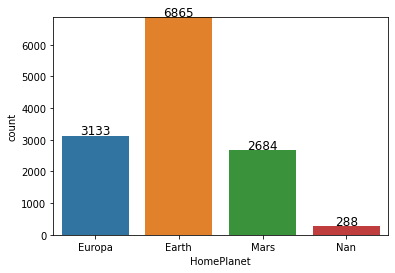

In [107]:
ax = sns.countplot(x=train_data['HomePlanet'].fillna('Nan'))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, max(train_data['HomePlanet'].value_counts()))
plt.show()

In [108]:
train_data.describe()

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12700.000000,12970.000000
mean,2.022976,28.741789,222.873676,451.407989,174.267336,307.834501,306.709683,2.432126,1463.093186
std,1.577102,14.149037,641.443514,1567.407196,583.941968,1118.267567,1168.321822,1.445236,2812.583464
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,729.000000
75%,2.000000,37.000000,62.000000,94.000000,34.000000,68.000000,53.000000,3.000000,1503.750000
max,8.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,7.000000,35987.000000


In [109]:
train_data[train_data['HomePlanet'].isnull()].describe()

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,283.000000,288.000000
mean,2.038194,29.159722,201.963933,314.737045,177.827540,264.454624,351.109706,2.462898,1310.092848
std,1.524001,14.483278,441.113458,1230.267839,557.935771,1014.081409,1158.483835,1.446885,2683.524905
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,26.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,758.000000
75%,3.000000,38.000000,85.250000,31.250000,37.000000,43.500000,77.750000,3.000000,1382.250000
max,8.000000,74.000000,2195.000000,16954.000000,7104.000000,11001.000000,9613.000000,7.000000,31811.000000


In [110]:
train_data.corr()

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
Group_count,1.000000,-0.175939,-0.034913,0.018868,-0.038883,0.016950,0.009441,-0.168901,0.005141
Age,-0.175939,1.000000,0.067994,0.123847,0.034852,0.116905,0.100119,0.972815,0.179830
RoomService,-0.034913,0.067994,1.000000,-0.017174,0.058835,0.011336,-0.021520,0.064243,0.226274
FoodCourt,0.018868,0.123847,-0.017174,1.000000,0.001066,0.227350,0.241446,0.117289,0.744276
ShoppingMall,-0.038883,0.034852,0.058835,0.001066,1.000000,0.012280,0.006923,0.033922,0.229388
Spa,0.016950,0.116905,0.011336,0.227350,0.012280,1.000000,0.146828,0.112850,0.590419
VRDeck,0.009441,0.100119,-0.021520,0.241446,0.006923,0.146828,1.000000,0.093590,0.604852
age_category,-0.168901,0.972815,0.064243,0.117289,0.033922,0.112850,0.093590,1.000000,0.170769
total_service,0.005141,0.179830,0.226274,0.744276,0.229388,0.590419,0.604852,0.170769,1.000000


##### HomePlanet이 없을 경우 서비스 이용의 빈도가 낮을을 활용하여, 상대적으로 서비스 이용이 낮은
##### 사용자가 많은 고향 행성으로 결측값을 채우기로 결정==>Mars로 결정

In [111]:
train_data.groupby(['HomePlanet'], as_index=False).mean()

,HomePlanet,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
0,Earth,1.878660,26.018645,138.483042,152.437271,133.777021,145.610230,143.062414,2.161817,713.369978
1,Europa,2.398659,34.107884,138.902839,1453.121546,140.515682,836.433870,877.799895,2.959896,3446.773832
2,Mars,1.951937,29.398286,538.985577,61.477528,316.847295,110.390837,53.887649,2.506121,1081.588886


In [112]:
train_data.loc[train_data['HomePlanet'].isnull(), 'HomePlanet'] = 'Earth'

In [113]:
train_data.isnull().sum()

Group_count         0
HomePlanet          0
CryoSleep           0
Destination       274
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              294
Transported      4277
age_category      270
total_service       0
Deck                0
room_number         0
room_side           0
dtype: int64

### Destination

In [114]:
train_data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

<AxesSubplot:xlabel='Destination', ylabel='count'>

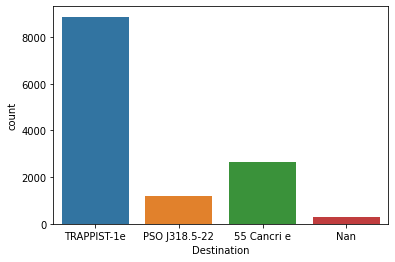

In [115]:
sns.countplot(x=train_data['Destination'].fillna('Nan'))

In [116]:
train_data[train_data['Destination'].isnull()].describe()

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,age_category,total_service
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,266.000000,274.000000
mean,1.978102,29.160584,196.285790,330.136296,168.521878,321.470553,244.689693,2.473684,1261.104211
std,1.561755,13.418719,477.471551,916.832082,393.102343,1193.025046,887.577223,1.422615,2142.223113
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,751.500000
75%,2.000000,37.750000,127.750000,109.000000,98.000000,103.250000,60.500000,3.000000,1379.827633
max,8.000000,73.000000,3651.000000,7964.000000,2624.000000,15586.000000,9613.000000,7.000000,18166.000000


In [117]:
train_data.loc[train_data['Destination'].isnull(), 'Destination'] = 'TRAPPIST-1e'

In [118]:
train_data.isnull().sum()

Group_count         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              294
Transported      4277
age_category      270
total_service       0
Deck                0
room_number         0
room_side           0
dtype: int64

### 분석을 위한 Data 정리

In [119]:
train_data = train_data.drop(['Name','age_category', 'total_service'], axis = 1)

In [120]:
train_data.isnull().sum()

Group_count        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
Deck               0
room_number        0
room_side          0
dtype: int64

##### HomePlanet One Hot Encoding 진행

In [121]:
train_data = pd.get_dummies(data = train_data, columns = ['HomePlanet'], prefix = 'HomePlanet')

##### CyroSleep One Hot Encoding 진행

In [122]:
train_data = pd.get_dummies(data = train_data, columns = ['CryoSleep'], prefix = 'CryoSleep')

##### Destination OneHot Encoding 진행

In [123]:
train_data = pd.get_dummies(data = train_data, columns = ['Destination'], prefix = 'Destination')

##### VIP One Hot Encoding 진행

In [124]:
train_data = pd.get_dummies(data = train_data, columns = ['VIP'], prefix = 'VIP')

In [125]:
train_data

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,room_number,room_side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,1,39.0,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0,1,0,1,0,0,1,1,0
1,1,24.0,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1,0,0,1,0,0,1,1,0
2,2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,0,1,0,1,0,0,1,0,1
3,2,33.0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,0,1,0,1,0,0,1,0,1
4,1,16.0,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2,34.0,0.0,0.0,0.0,0.0,0.0,NaN,G,1496,S,1,0,0,1,0,0,1,1,0
4273,1,42.0,0.0,847.0,17.0,10.0,144.0,NaN,F,1000,s,1,0,0,1,0,0,1,1,0
4274,1,27.0,0.0,0.0,0.0,0.0,0.0,NaN,D,296,P,0,0,1,1,1,0,0,1,0
4275,1,29.0,0.0,2680.0,0.0,0.0,523.0,NaN,D,297,P,0,1,0,1,0,0,1,1,0


##### Deck, RoomSide OneHot Encoding 진행

In [126]:
train_data = pd.get_dummies(data = train_data, columns = ['Deck'], prefix = 'Deck')
train_data = pd.get_dummies(data = train_data, columns = ['room_side'], prefix = 'room_side')

### Decision Tree와 Random Forest로 분석 진행-->분류문제기 때문

In [127]:
train_list = []
out = ['VIP_False','room_side_s', 'Destination_PSO J318.5-22', 'Destination_55 Cancri e']
for x in train_data.columns:
    if x == 'Transported':
        continue

    train_list.append(x)

train_list

['Group_count',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'room_number',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_True',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_False',
 'VIP_True',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'room_side_P',
 'room_side_S',
 'room_side_s']

In [128]:
train_x = train_data[train_data['Transported'].notnull()][train_list]

In [129]:
train_x

,Group_count,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,room_number,HomePlanet_Earth,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,room_side_P,room_side_S,room_side_s
0,1,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,41.0,0.0,6819.0,0.0,1643.0,74.0,98,0,1,...,0,0,0,0,0,0,0,1,0,0
8689,1,18.0,0.0,0.0,0.0,0.0,0.0,1499,1,0,...,0,0,0,0,0,1,0,0,1,0
8690,1,26.0,0.0,0.0,1872.0,1.0,0.0,1500,1,0,...,0,0,0,0,0,1,0,0,1,0
8691,2,32.0,0.0,1049.0,0.0,353.0,3235.0,608,0,1,...,0,0,0,1,0,0,0,0,1,0


In [130]:
train_x = train_x.astype({'Age':'int',
                          'RoomService':'int',
                          'FoodCourt':'int',
                          'ShoppingMall':'int',
                          'Spa':'int',
                          'VRDeck':'int',
                          })

In [131]:
train_y = train_data[train_data['Transported'].notnull()]['Transported']
train_y.shape

(8693,)

In [132]:
test_x = train_data[train_data['Transported'].isnull()][train_list]

In [133]:
test_x = test_x.astype({'Age':'int',
                          'RoomService':'int',
                          'FoodCourt':'int',
                          'ShoppingMall':'int',
                          'Spa':'int',
                          'VRDeck':'int'
                          })

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy', 
                                  n_estimators=450,
                                  min_samples_split=32,
                                  min_samples_leaf=3,
                                  max_features='sqrt',
                                  oob_score=True,
                                  max_depth=45,
                                  random_state=1,
                                  n_jobs=-1)

In [135]:
train_y =  pd.get_dummies(data = train_y, columns = ['Transported'], prefix = 'Transported')

In [136]:
train_y = train_y['Transported_True']

In [137]:
rf_model.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', max_depth=45, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=32,
                       n_estimators=450, n_jobs=-1, oob_score=True,
                       random_state=1)

In [138]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [139]:
predict = rf_model.predict(test_x)

In [140]:
predict

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [141]:
submission_data = pd.DataFrame(columns=["PassengerId", "Transported"])
submission_data["PassengerId"]=test_data['PassengerId']
submission_data["Transported"]= [True if x==1. else False for x in predict]

submission_data.to_csv('submission.csv', index=False)

In [142]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


/Users/hahmwj/miniforge3/envs/hahm/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

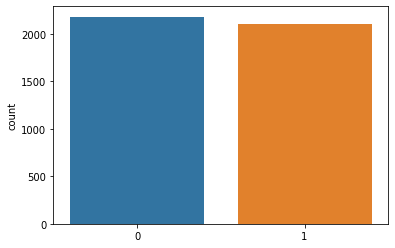

In [143]:
sns.countplot(predict)

In [144]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

In [145]:
predict_clf = clf.predict(test_x)

In [146]:
submission_data_clf = pd.DataFrame(columns=["PassengerId", "Transported"])
submission_data_clf["PassengerId"]=test_data['PassengerId']
submission_data_clf["Transported"]= [True if x==1. else False for x in predict_clf]

submission_data_clf.to_csv('submission_clf.csv', index=False)

In [147]:
rf_model_2 = RandomForestClassifier(criterion='entropy', 
                                  n_estimators=450,
                                  min_samples_split=32,
                                  min_samples_leaf=3,
                                  max_features='sqrt',
                                  oob_score=True,
                                  max_depth=100,
                                  random_state=1,
                                  n_jobs=-1)

rf_model_2.fit(train_x, train_y)
predict_rf_model_2 = rf_model_2.predict(test_x)

submission_data = pd.DataFrame(columns=["PassengerId", "Transported"])
submission_data["PassengerId"]=test_data['PassengerId']
submission_data["Transported"]= [True if x==1. else False for x in predict_rf_model_2]

submission_data.to_csv('submission_rf_model_2.csv', index=False)

In [148]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost.fit(train_x, train_y)
predict_AdaBoost = AdaBoost.predict(test_x)

submission_data = pd.DataFrame(columns=["PassengerId", "Transported"])
submission_data["PassengerId"]=test_data['PassengerId']
submission_data["Transported"]= [True if x==1. else False for x in predict_AdaBoost]

submission_data.to_csv('submission_AdaBoost.csv', index=False)